# Notebook to find the quality of mapping done by STAR Solo for samples from SRA Project - PRJEB39602

- **Developed by**: Srivalli Kolla

- **Created date** : 29 October, 2024

- **Modification date** : 29 October, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import Packages

In [31]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc

In [32]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 300, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
asttokens           NA
attr                23.2.0
cffi                1.16.0
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
h5py                3.11.0
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain             0.8.2
matplotlib          3.8.4
matplotlib_inline   0.1.7
mpl_toolkits        NA
natsort             8.4.0
numba               0.60.0
numexpr             2.10.1
numpy               1.26.4
packaging           24.1
pandas              2.2.2
parso  

# Import data

In [33]:
parent_folder = '../ncbi-sra/mapped_files/'
folders = ['ERR6449801',
'ERR6449803',
'ERR6449820',
'ERR6449847',
'ERR6449908',
'ERR6449913',
'ERR6449914',
'ERR6449915',
'ERR6449920',
'ERR6449932',
'ERR6449933',
'ERR6449960',
'ERR6449969',
'ERR6449986',
'ERR6449990',
'ERR7423245',
'ERR7423246',
'ERR7423252',
'ERR7423268',
'ERR7423284',
'ERR7423293',
'ERR7423294',
'ERR7423297',
'ERR7423304',
'ERR7423313',
'ERR7423322',
'ERR7423335',
'ERR7423342',
'ERR7423350',
'ERR7423357',
'ERR7423362',
'ERR7423372',
'ERR7423384',
'ERR7423386',
'ERR7423420',
'ERR7423423',
'ERR7423466',
'ERR7423467',
'ERR7423472',
'ERR7423485',
'ERR6449746',
'ERR6449747',
'ERR6449750',
'ERR6449751',
'ERR6449756',
'ERR6449758',
'ERR6449761',
'ERR6449763',
'ERR6449765',
'ERR6449767',
'ERR6449775',
'ERR6449783',
'ERR6449789',
'ERR6449790',
'ERR6449792',
'ERR6449793',
'ERR6449799',
'ERR6449808',
'ERR6449810',
'ERR6449815',
'ERR6449818',
'ERR6449822',
'ERR6449824',
'ERR6449826',
'ERR6449828',
'ERR6449829',
'ERR6449831',
'ERR6449835',
'ERR6449837',
'ERR6449840',
'ERR6449845',
'ERR6449846',
'ERR6449849',
'ERR6449852',
'ERR6449853',
'ERR6449862',
'ERR6449866',
'ERR6449871',
'ERR6449872',
'ERR6449874',
'ERR6449878',
'ERR6449879',
'ERR6449884',
'ERR6449888',
'ERR6449892',
'ERR6449894',
'ERR6449902',
'ERR6449905',
'ERR6449912',
'ERR6449918',
'ERR6449924',
'ERR6449926',
'ERR6449934',
'ERR6449936',
'ERR6449938',
'ERR6449942',
'ERR6449944',
'ERR6449945',
'ERR6449950',
'ERR6449953',
'ERR6449954',
'ERR6449955',
'ERR6449959',
'ERR6449961',
'ERR6449962',
'ERR6449964',
'ERR6449965',
'ERR6449970',
'ERR6449971',
'ERR6449976',
'ERR6449982',
'ERR6449985',
'ERR6449989',
'ERR6449992',
'ERR6449996',
'ERR6449997',
'ERR6449998',
'ERR6449999',
'ERR7423235',
'ERR7423236',
'ERR7423237',
'ERR7423241',
'ERR7423243',
'ERR7423254',
'ERR7423258',
'ERR7423260',
'ERR7423262',
'ERR7423265',
'ERR7423270',
'ERR7423277',
'ERR7423279',
'ERR7423281',
'ERR7423288',
'ERR7423289',
'ERR7423292',
'ERR7423295',
'ERR7423296',
'ERR7423300',
'ERR7423302',
'ERR7423303',
'ERR7423307',
'ERR7423311',
'ERR7423312',
'ERR7423316',
'ERR7423318',
'ERR7423319',
'ERR7423320',
'ERR7423325',
'ERR7423326',
'ERR7423327',
'ERR7423330',
'ERR7423332',
'ERR7423336',
'ERR7423345',
'ERR7423347',
'ERR7423348',
'ERR7423351',
'ERR7423355',
'ERR7423356',
'ERR7423361',
'ERR7423370',
'ERR7423371',
'ERR7423377',
'ERR7423381',
'ERR7423383',
'ERR7423388',
'ERR7423389',
'ERR7423391',
'ERR7423393',
'ERR7423394',
'ERR7423397',
'ERR7423399',
'ERR7423401',
'ERR7423403',
'ERR7423405',
'ERR7423408',
'ERR7423409',
'ERR7423410',
'ERR7423411',
'ERR7423412',
'ERR7423415',
'ERR7423418',
'ERR7423430',
'ERR7423431',
'ERR7423432',
'ERR7423437',
'ERR7423439',
'ERR7423440',
'ERR7423445',
'ERR7423446',
'ERR7423447',
'ERR7423470',
'ERR7423473',
'ERR7423477',
'ERR7423478',
'ERR7423482',
'ERR7423483',
'ERR6449745',
'ERR6449748',
'ERR6449749',
'ERR6449752',
'ERR6449753',
'ERR6449754',
'ERR6449755',
'ERR6449757',
'ERR6449759',
'ERR6449760',
'ERR6449762',
'ERR6449764',
'ERR6449766',
'ERR6449768',
'ERR6449769',
'ERR6449770',
'ERR6449771',
'ERR6449772',
'ERR6449773',
'ERR6449774',
'ERR6449776',
'ERR6449777',
'ERR6449778',
'ERR6449779',
'ERR6449780',
'ERR6449781',
'ERR6449782',
'ERR6449784',
'ERR6449785',
'ERR6449786',
'ERR6449787',
'ERR6449788',
'ERR6449791',
'ERR6449794',
'ERR6449795',
'ERR6449796',
'ERR6449797',
'ERR6449798',
'ERR6449800',
'ERR6449802',
'ERR6449804',
'ERR6449805',
'ERR6449806',
'ERR6449807',
'ERR6449809',
'ERR6449811',
'ERR6449812',
'ERR6449813',
'ERR6449814',
'ERR6449816',
'ERR6449817',
'ERR6449819',
'ERR6449821',
'ERR6449823',
'ERR6449825',
'ERR6449827',
'ERR6449830',
'ERR6449832',
'ERR6449833',
'ERR6449834',
'ERR6449836',
'ERR6449838',
'ERR6449839',
'ERR6449841',
'ERR6449842',
'ERR6449843',
'ERR6449844',
'ERR6449848',
'ERR6449850',
'ERR6449851',
'ERR6449854',
'ERR6449855',
'ERR6449856',
'ERR6449857',
'ERR6449858',
'ERR6449859',
'ERR6449860',
'ERR6449861',
'ERR6449863',
'ERR6449864',
'ERR6449865',
'ERR6449867',
'ERR6449868',
'ERR6449869',
'ERR6449870',
'ERR6449873',
'ERR6449875',
'ERR6449876',
'ERR6449877',
'ERR6449880',
'ERR6449881',
'ERR6449882',
'ERR6449883',
'ERR6449885',
'ERR6449886',
'ERR6449887',
'ERR6449889',
'ERR6449890',
'ERR6449891',
'ERR6449893',
'ERR6449895',
'ERR6449896',
'ERR6449897',
'ERR6449898',
'ERR6449899',
'ERR6449900',
'ERR6449901',
'ERR6449903',
'ERR6449904',
'ERR6449906',
'ERR6449907',
'ERR6449909',
'ERR6449910',
'ERR6449911',
'ERR6449916',
'ERR6449917',
'ERR6449919',
'ERR6449921',
'ERR6449922',
'ERR6449923',
'ERR6449925',
'ERR6449927',
'ERR6449928',
'ERR6449929',
'ERR6449930',
'ERR6449931',
'ERR6449935',
'ERR6449937',
'ERR6449939',
'ERR6449940',
'ERR6449941',
'ERR6449943',
'ERR6449946',
'ERR6449947',
'ERR6449948',
'ERR6449949',
'ERR6449951',
'ERR6449952',
'ERR6449956',
'ERR6449957',
'ERR6449958',
'ERR6449963',
'ERR6449966',
'ERR6449967',
'ERR6449968',
'ERR6449972',
'ERR6449973',
'ERR6449974',
'ERR6449975',
'ERR6449977',
'ERR6449978',
'ERR6449979',
'ERR6449980',
'ERR6449981',
'ERR6449983',
'ERR6449984',
'ERR6449987',
'ERR6449988',
'ERR6449991',
'ERR6449993',
'ERR6449994',
'ERR6449995',
'ERR6450000',
'ERR7423232',
'ERR7423233',
'ERR7423234',
'ERR7423251',
'ERR7423285',
'ERR7423286',
'ERR7423287',
'ERR7423290',
'ERR7423291',
'ERR7423298',
'ERR7423299',
'ERR7423301',
'ERR7423305',
'ERR7423306',
'ERR7423308',
'ERR7423324',
'ERR7423328',
'ERR7423329',
'ERR7423331',
'ERR7423333',
'ERR7423334',
'ERR7423337',
'ERR7423338',
'ERR7423339',
'ERR7423340',
'ERR7423341',
'ERR7423343',
'ERR7423344',
'ERR7423346',
'ERR7423349',
'ERR7423366',
'ERR7423367',
'ERR7423368',
'ERR7423369',
'ERR7423373',
'ERR7423374',
'ERR7423375',
'ERR7423376',
'ERR7423378',
'ERR7423398',
'ERR7423400',
'ERR7423402',
'ERR7423404',
'ERR7423413',
'ERR7423414',
'ERR7423419',
'ERR7423421',
'ERR7423427',
'ERR7423428',
'ERR7423429',
'ERR7423433',
'ERR7423434',
'ERR7423435',
'ERR7423436',
'ERR7423438',
'ERR7423441',
'ERR7423442',
'ERR7423453',
'ERR7423454',
'ERR7423455',
'ERR7423456',
'ERR7423457',
'ERR7423465',
'ERR7423468',
'ERR7423469',
'ERR7423471',
'ERR7423487',
'ERR7423238',
'ERR7423239',
'ERR7423240',
'ERR7423242',
'ERR7423244',
'ERR7423247',
'ERR7423248',
'ERR7423249',
'ERR7423250',
'ERR7423253',
'ERR7423255',
'ERR7423256',
'ERR7423257',
'ERR7423259',
'ERR7423261',
'ERR7423263',
'ERR7423264',
'ERR7423266',
'ERR7423267',
'ERR7423269',
'ERR7423271',
'ERR7423272',
'ERR7423273',
'ERR7423274',
'ERR7423275',
'ERR7423276',
'ERR7423278',
'ERR7423280',
'ERR7423282',
'ERR7423283',
'ERR7423309',
'ERR7423310',
'ERR7423314',
'ERR7423315',
'ERR7423317',
'ERR7423321',
'ERR7423323',
'ERR7423352',
'ERR7423353',
'ERR7423354',
'ERR7423358',
'ERR7423359',
'ERR7423360',
'ERR7423363',
'ERR7423364',
'ERR7423365',
'ERR7423379',
'ERR7423380',
'ERR7423382',
'ERR7423385',
'ERR7423387',
'ERR7423390',
'ERR7423392',
'ERR7423395',
'ERR7423396',
'ERR7423406',
'ERR7423407',
'ERR7423416',
'ERR7423417',
'ERR7423422',
'ERR7423424',
'ERR7423425',
'ERR7423426',
'ERR7423443',
'ERR7423444',
'ERR7423448',
'ERR7423449',
'ERR7423450',
'ERR7423451',
'ERR7423452',
'ERR7423458',
'ERR7423459',
'ERR7423460',
'ERR7423461',
'ERR7423462',
'ERR7423463',
'ERR7423464',
'ERR7423474',
'ERR7423475',
'ERR7423476',
'ERR7423479',
'ERR7423480',
'ERR7423481',
'ERR7423484',
'ERR7423486',]

# Define 'Uniquely mapped reads %' extraction from file

1. Define the folder and file structure to access correct file
2. Extract percentage
3. Make a dataframe with folder name and plot

In [34]:
def extract_uniquely_mapped_reads_percentage(file_path):
    """Extracts uniquely mapped reads percentage from a specified Log.final.out file."""
    with open(file_path, 'r') as f:
        for line in f:
            if 'Uniquely mapped reads %' in line:
                # Extract the percentage value
                percentage = float(line.split('|')[-1].strip().replace('%', ''))
                return percentage
    return None 

# Plotting

In [35]:
def extract_uniquely_mapped_reads_percentage(log_file_path):
    """Extract the uniquely mapped reads percentage from a given log file."""
    percentage = None
    with open(log_file_path, 'r') as file:
        for line in file:
            if 'Uniquely mapped reads %' in line:
             
                parts = line.split()
                percentage_str = parts[-1]  
                
                percentage = float(percentage_str.strip('%'))  # Strip '%' and convert to float
                break
    return percentage

def visualize_uniquely_mapped_reads_from_parent_folder(parent_folder, target_folders):
    """Visualize uniquely mapped reads percentages from Log.final.out files in specified parent folder for specific folders."""
    data = []
    files_not_found = []  

    for folder_name in target_folders:
        subfolder_path = os.path.join(parent_folder, folder_name)
        
        if os.path.isdir(subfolder_path):
            log_file_path = os.path.join(subfolder_path, "outputLog.final.out")

            if os.path.isfile(log_file_path):
                print(f"Reading file: {log_file_path}")
                percentage = extract_uniquely_mapped_reads_percentage(log_file_path)
                if percentage is not None:
                    print(f"Extracted uniquely mapped reads % from {log_file_path}: {percentage}%")
                    data.append((folder_name, percentage))  # Append folder name and percentage
                else:
                    print(f"No percentage found in: {log_file_path}")
            else:
                print(f"File does not exist: {log_file_path}")
                files_not_found.append(log_file_path)  # Add the not found file to the list
        else:
            print(f"Directory does not exist: {subfolder_path}")
    
    if not data:
        print("No uniquely mapped reads percentages found.")
        return  

 
    df = pd.DataFrame(data, columns=['Folder', 'Uniquely Mapped Reads %'])

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.bar(df['Folder'], df['Uniquely Mapped Reads %'], color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Samples')
    plt.ylabel('Uniquely Mapped Reads %')
    plt.title('Uniquely Mapped Reads Percentage from PRJEB39602')
    plt.tight_layout()
    plt.grid(False)
    

    output_path = '../ncbi_sra/figures/PRJEB39602_mapping_quality.png'
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    plt.savefig(output_path)

    plt.show()


    if files_not_found:
        print(f"\nFiles not found ({len(files_not_found)}):")
        for file in files_not_found:
            print(file)


Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449801/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449801/outputLog.final.out: 82.22%
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449803/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449803/outputLog.final.out: 82.42%
File does not exist: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449820/outputLog.final.out
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449847/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449847/outputLog.final.out: 89.69%
Reading file: /mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449908/outputLog.final.out
Extracted uniquely mapped reads % from /mnt/LaCIE/skol

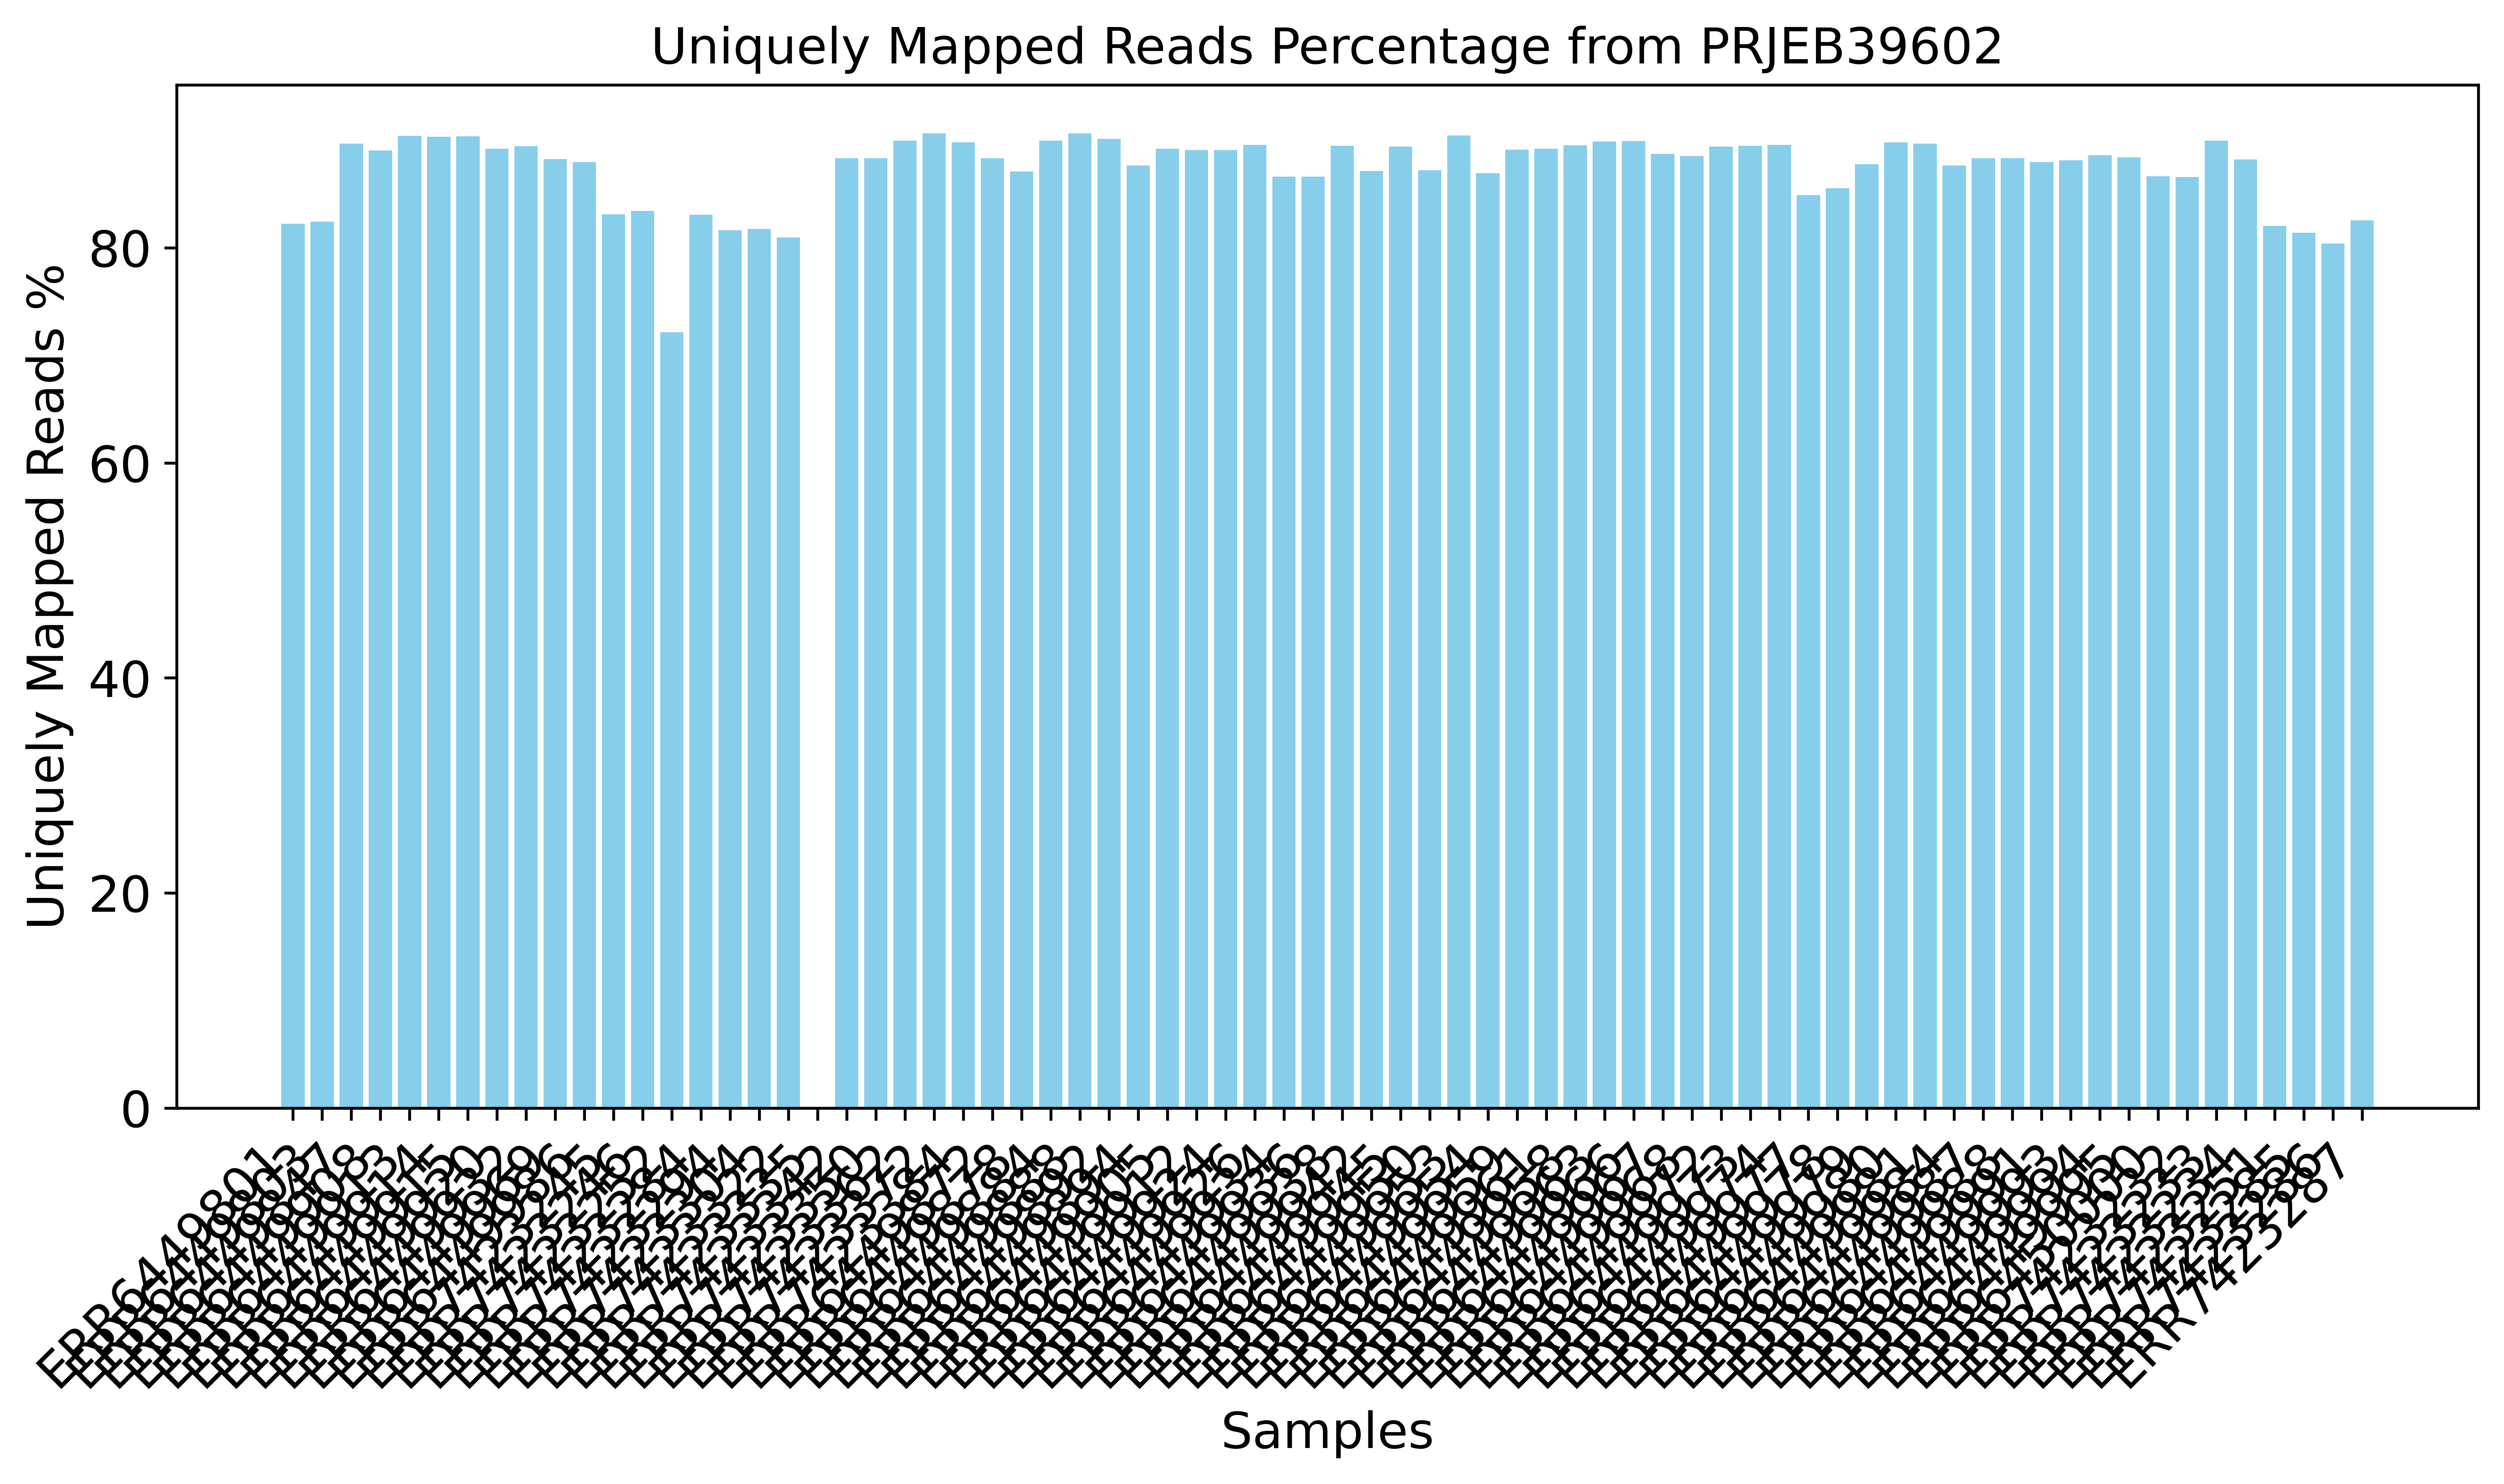


Files not found (19):
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449820/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449933/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449960/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449990/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423268/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423293/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423297/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423313/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423357/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR7423386/outputLog.final.out
/mnt/LaCIE/skolla/sc-heart-consortium/ncbi-sra/mapped_files/ERR6449

In [36]:
visualize_uniquely_mapped_reads_from_parent_folder(parent_folder, folders)